# Classification. Linear models and KNN

In [240]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(1.75 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [3]:
from sklearn.exceptions import NotFittedError

In [4]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    def get_sigmoid(self, X, weights):
        """Compute the sigmoid value."""
        return 1 / (1 + np.exp(-X*weights))
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
        #Cross Entropy Loss
        loss=-np.sum(y*np.log(x*weights))
        return loss/float(x.shape[0])
     
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
        
        for i in range(self.max_iter):
            delta = "<your code>"
            self.weights_ -= self.eta * delta
            if "<your code>":
                break
     
    #def softmax(x):
    #    return np.exp(x)/np.sum(np.exp(x),axis=0)
    
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        
        Make linear prediction based on cost and gradient descent
        :param X: new data to make predictions on
        :param labels: boolean
        :return: return prediction
        """
        if self.intercept:
            intercept = np.ones((np.shape(X)[0],1))
            X = np.concatenate((intercept, X), 1)
            
        n_samples, n_features = np.shape(X)
        
        prediction = []
        
        for sample in range(n_samples):
            yhat = 0
            for value in range(n_features):
                yhat += X[sample, value] * self.theta[value]
            
            pred = self.sigmoid(yhat)
            
            prediction.append(yhat)   
                
        return prediction

In [5]:
from sklearn import datasets
from sklearn import metrics

array([-1, -1, -1, ..., -1,  1,  1], dtype=int32)

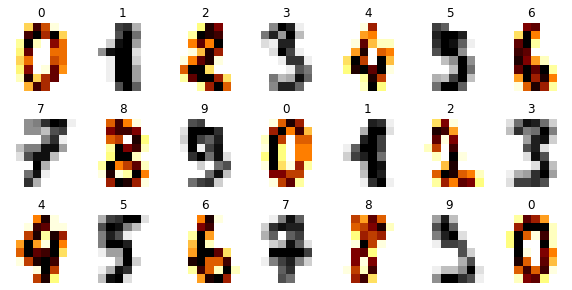

In [6]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1
y_train

In [7]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test) == [-1, 1]).all()

In [8]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [9]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [328]:
assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                   np.array([0.58662, 0.40131]))

In [ ]:
lr_clf.fit(X_train, y_train)

In [ ]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

In [ ]:
model = CustomLogisticRegression()

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
train_acc, test_acc

In [ ]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

In [ ]:
## your code

**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Try different regularization parameter values and compare the model quality.

In [ ]:
## your code

< your thoughts >

**(0.25 points)** Compare zero initialization and random initialization. 

In [ ]:
## your code

< your thoughts >

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(X points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [ ]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        # <your code>
        pass
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        # <your code>
        pass
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            
            weights_of_points = np.ones(P.shape)
            if self.weights == 'distance':
                weights_of_points = 'your code'
                
            # <your code>
            pass
        
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [ ]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

In [ ]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

In [ ]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
assert train_acc == 1
assert test_acc > 0.98

**(X points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

< your thoughts >

**(X points)** Try different n_neighbors parameters and compare the output probabilities of the model.

In [ ]:
## your code

< your thoughts >

**(X points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

In [ ]:
## your code

< your thoughts >

**(X points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

< your thoughts >

**(X points)** Suggest different task and distance function that you think would be suitable for it.

< your thoughts >

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [242]:
data = pd.read_csv("data/train.csv").set_index('PassengerId')
data_test = pd.read_csv("data/test.csv").set_index('PassengerId')

In [243]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [244]:
## your code
data["Sex"].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

In [245]:
data.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           31226
        0           12660
male    0           44566
        1           11548
Name: Survived, dtype: int64

- нарисем красивые графики:

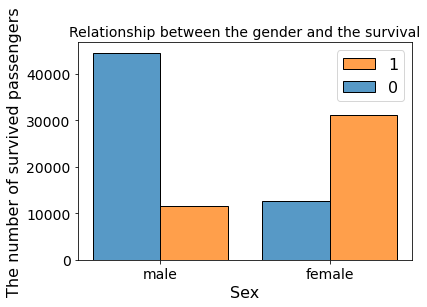

In [246]:
plt.title('Relationship between the gender and the survival', fontdict={'fontsize':14})
sns.histplot(data=data, x=data['Sex'], hue=data['Survived'], multiple="dodge", shrink=0.8, bins=4)
plt.legend(data['Survived'].unique(), fontsize=16)
plt.ylabel('The number of survived passengers', size=16)
plt.xlabel('Sex', size=16)
plt.yticks(size=14)
plt.xticks(size=14)
plt.show()

- Колличество мужчин было больше чем женщин, но процент и абсолютное колличесво выжывших женщин больше чем мужчин. Есть предположение, что боьшинство мужчин, погибая, учавствовали в  спасении женщин.

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

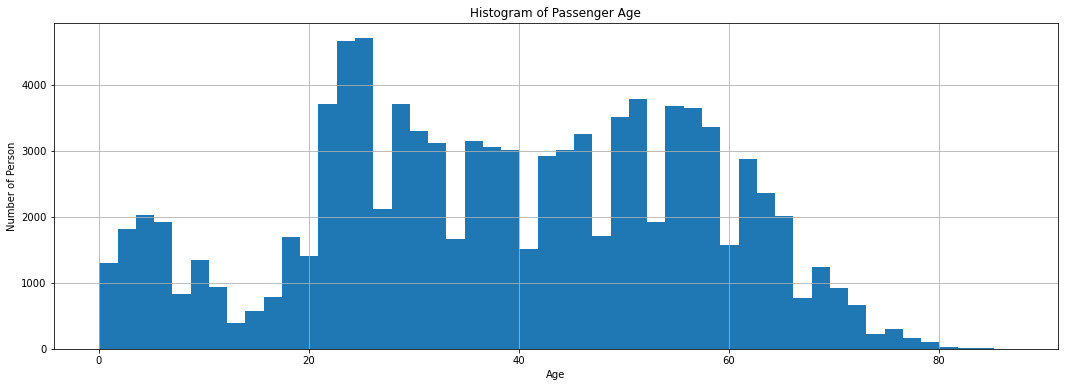

In [247]:
# age distribution of the passenger
fig = plt.figure(figsize=(18, 6))
data.Age.hist(bins=50)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age");

In [248]:
# the average age of survived  passengers
survivors_data = data[data.Survived==True]
survivors_data.Age.mean()

40.55379931430776

In [249]:
# the median age of survived passengers
survivors_data.Age.median()

43.0

In [250]:
# the average age of deceased passengers
deceased_data = data[data.Survived==False]
deceased_data.Age.mean()

36.708694881533724

In [251]:
# the median age of deceased passengers
deceased_data.Age.median()

36.0

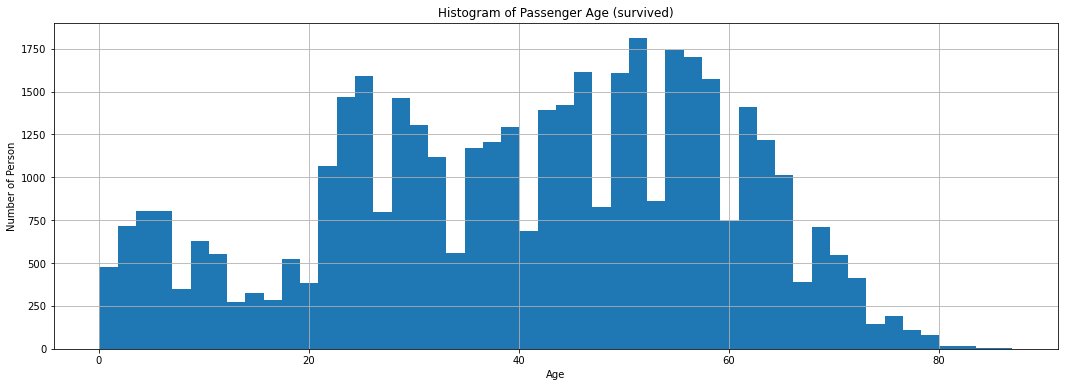

In [252]:
# age distribution of the survived passenger
fig = plt.figure(figsize=(18, 6))
survivors_data.Age.hist(bins=50)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age (survived)");

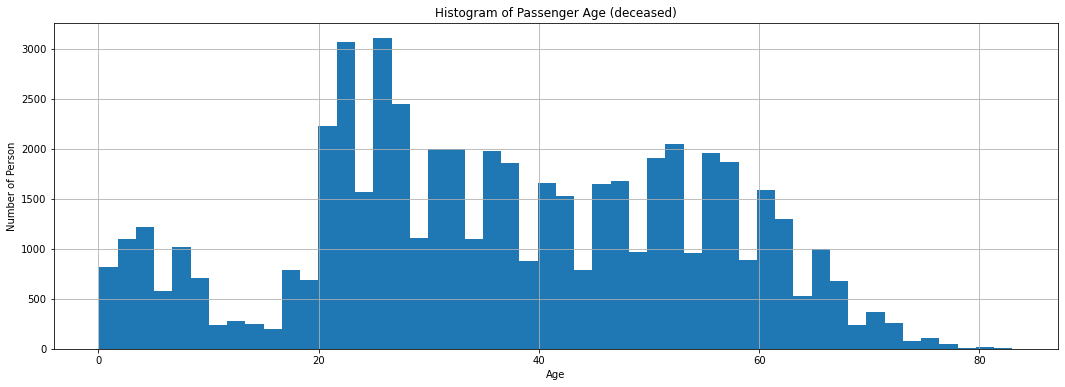

In [253]:
# age distribution of the deceased passenger
fig = plt.figure(figsize=(18, 6))
deceased_data.Age.hist(bins=50)
plt.xlabel("Age")
plt.ylabel("Number of Person")
plt.title("Histogram of Passenger Age (deceased)");

- При спасении пассажиров Титаника, уделяли большое внимание спасению женщин, детей и людей старшего возраста, что говорит об  организованности процесса спасения в очень сложных условиях

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

In [254]:
Pclass_value = data.Pclass.value_counts()
Pclass_value

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

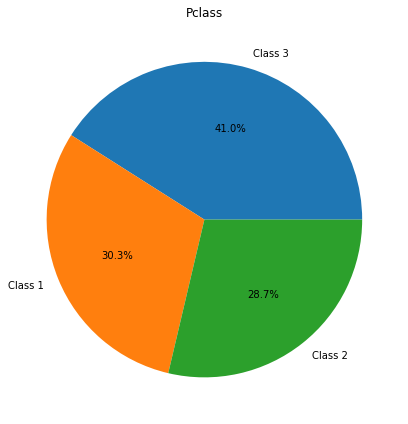

In [255]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data.Pclass.value_counts(), labels=["Class 3","Class 1","Class 2"], autopct='%.1f%%')
ax.set_title('Pclass')
plt.tight_layout()

- Наибольшее коллиество пассажиров приходится на третий класс, затем на первый и потом на второй

In [256]:
data.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

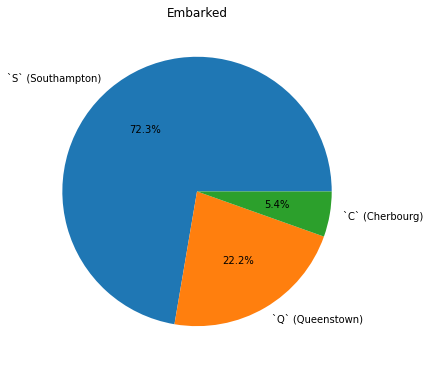

In [257]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data.Embarked.value_counts(), labels=["`S` (Southampton)","`Q` (Queenstown)","`C` (Cherbourg)"], autopct='%.1f%%')
ax.set_title('Embarked')
plt.tight_layout()

- Наибольшее количество пассажиров совершило посадку в `S` (Southampton), далее  в `Q` (Queenstown) и наименьшее в `C` (Cherbourg).

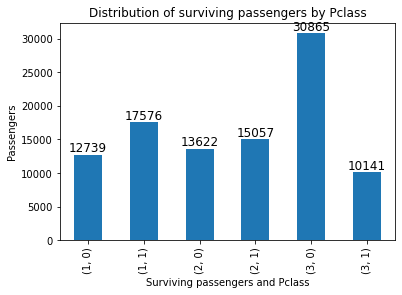

In [258]:
# The relationship between the Pclass and the survival

data.groupby(['Pclass', 'Survived'])['Pclass'].count().plot(kind='bar',
                                            title='Distribution of surviving passengers by Pclass',
                                            xlabel='Surviving passengers and Pclass', ylabel='Passengers')
for i, val in enumerate(data.groupby(['Pclass', 'Survived'])['Pclass'].count().values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

Больше спаслось пассажиров первого и второго класса. Вероятно потому, что расстояние от кают 3 класса до палубы больше.

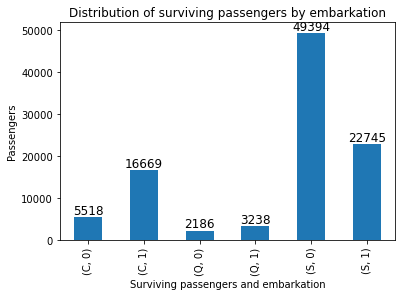

In [259]:
# The relationship between the embarkation and the survival

data.groupby(['Embarked', 'Survived'])['Embarked'].count().plot(kind='bar',
                                            title='Distribution of surviving passengers by embarkation',
                                            xlabel='Surviving passengers and embarkation', ylabel='Passengers')
for i, val in enumerate(data.groupby(['Embarked', 'Survived'])['Embarked'].count().values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

- В порту Southampton село - 72,3 %. Из них выжило - 31,5%.  
- В порту Cherbourg село   - 22,2 %. Из них выжило - 75,1 %
- В порту Queenstown село   - 5,4 %. Из них выжило - 59,7 %

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [260]:
pd.DataFrame({
    'Missing_value': data.isna().sum(),
    'Missing(%)': (data.isna().sum() / data.shape[0]) * 100
}).sort_values(by='Missing_value', ascending=False)

,Missing_value,Missing(%)
Cabin,67866,67.866
Ticket,4623,4.623
Age,3292,3.292
Embarked,250,0.250
Fare,134,0.134
Survived,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
SibSp,0,0.000


Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Для работы с missing values данные сначала делят на категориальные и числовые.    

для числовых данных замена missing values может быть следующей:   
- замена числовых данных средним значением. Данныя замена возможна, когда данные не имеют выбросов;
- замена числовых данных медианным значением. Медиана менее чувствительна к выбросам занчений;
- замена числовых данных - bfill — обратная заливка — будет распространять первое наблюдаемое ненулевое значение назад;
- замена числовых данных - ffill — прямое заполнение — распространяет вперед последнее наблюдаемое ненулевое значение;
- замена числовых данных интерполированными значениями; 
- разделение/объединение столбцов;
- удаление столбцов/строк с большим пропуском данных;
- фильтрация подмножеств, стандартизация данных, масштабирование данных, замена нулевыми занчениями; 
- множество статистических методов замены (методы Hot/Cold-deck — это методы, которые заменяют отсутствующие значения случайно выбранными значениями из текущего имеющегося  или отдельно синтезированного набора данных и др.).

Для категориальных данных часто используется замена missing values на моду (наиболее часто встречающееся категориальное значение)

Все вышепреведенные методы очистки и подготовки данных сильно зависят от вида данных и в каждом конкретном случае могут иметь свои преемущества и недостатки.    
Ниже в Prepare the Features и Feature Engineering  мы применим комбинации этих методов для подготовки данных к обучению

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

- Разделим данные на числовые и категориальные

### Categorical features

- 'Pclass', 'Sex', 'Embarked', 'Cabin', 'SibSp', 'Parch', 'Name', 'Ticket'

посмотрим на данные и их взаимосвязи

In [261]:
data[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.579779
2,0.525018
3,0.247305


In [262]:
data[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.711525
male,0.205795


In [263]:
data[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.751296
Q,0.596976
S,0.315294


In [264]:
data[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
2,0.453956
1,0.433748
0,0.426843
3,0.400000
8,0.385135
4,0.375856
5,0.189394


In [265]:
data[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
1,0.592028
5,0.570997
3,0.492370
9,0.439394
0,0.405208
2,0.384745
4,0.284753
6,0.205882


In [266]:
data[['Embarked', 'Pclass']].groupby('Embarked').mean().sort_values(by='Pclass', ascending=False)

,Pclass
Embarked,
S,2.294709
C,1.654978
Q,1.461283


In [267]:
title_mapping = {"male": 1, "female": 0}
data_ = data.copy()
data_['Sex'] = data_['Sex'].map(title_mapping)
print(data_[['Embarked', 'Sex']].groupby('Embarked').mean().sort_values(by='Sex', ascending=False))
del(data_)

               Sex
Embarked          
S         0.665687
Q         0.289823
C         0.288502


Низкая выживаемость пассажиров, севших в S наверное обосновывается большим колличеством мужчин

### Numerical features

- 'Age', 'Fare'

<AxesSubplot:xlabel='Age', ylabel='Count'>

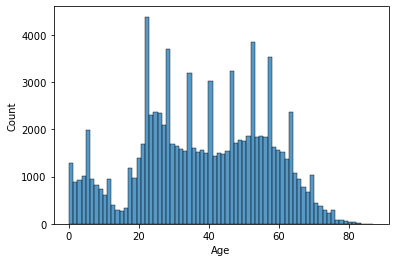

In [268]:
sns.histplot(data.Age.dropna())

<AxesSubplot:xlabel='Fare', ylabel='Count'>

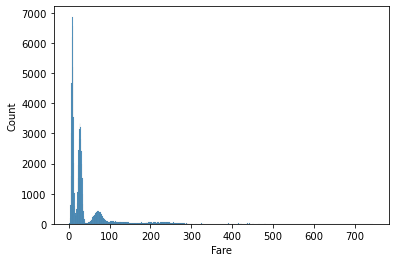

In [269]:
sns.histplot(data.Fare.dropna())

In [270]:
data_test = pd.read_csv("data/test.csv").set_index('PassengerId')

In [271]:
pd.DataFrame({
    'Missing_value': data_test.isna().sum(),
    'Missing(%)': (data_test.isna().sum() / data_test.shape[0]) * 100
}).sort_values(by='Missing_value', ascending=False)

,Missing_value,Missing(%)
Cabin,70831,70.831
Ticket,5181,5.181
Age,3487,3.487
Embarked,277,0.277
Fare,133,0.133
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
SibSp,0,0.000
Parch,0,0.000


- мы видим, что процент Missing_value у data_test приблизительно такой же как и у data.

##  Подготовка данных к обучению


In [272]:
train_df = data
test_df = data_test
combine = [train_df,test_df]

In [273]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",0,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",0,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",0,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",0,25.00,0,0,427635,7.76,NaN,S


In [274]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [275]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,44,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",0,31,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",0,0,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",0,19,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",0,25,0,0,427635,7.76,NaN,S


In [276]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.087, 17.4]",0.437358
1,"(17.4, 34.8]",0.337140
2,"(34.8, 52.2]",0.456702
3,"(52.2, 69.6]",0.485313
4,"(69.6, 87.0]",0.632806


In [277]:
#Let us replace Age with ordinals based on these bands.

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 17.4, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 17.4) & (dataset['Age'] <= 34.8), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 34.8) & (dataset['Age'] <= 52.2), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 52.2) & (dataset['Age'] <= 69.6), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 69.6, 'Age']
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,2,2,0,209245,27.14,C12239,S,"(34.8, 52.2]"
1,0,3,"Bryan, Drew",0,1,0,0,27323,13.35,NaN,S,"(17.4, 34.8]"
2,0,3,"Owens, Kenneth",0,0,1,2,CA 457703,71.29,NaN,S,"(-0.087, 17.4]"
3,0,3,"Kramer, James",0,1,0,0,A. 10866,13.04,NaN,S,"(17.4, 34.8]"
4,1,3,"Bond, Michael",0,1,0,0,427635,7.76,NaN,S,"(17.4, 34.8]"


### Create new feature combining exisiting features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [278]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
1,2,0.516254
15,18,0.500000
2,3,0.482436
9,10,0.452229
11,12,0.450000
5,6,0.440345
10,11,0.414062
3,4,0.409194
0,1,0.404394
4,5,0.335294


In [279]:
## We can create another feature called IsAlone

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.465594
1,1,0.404394


In [280]:
# Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBand,IsAlone
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,2,209245,27.14,C12239,S,"(34.8, 52.2]",0
1,0,3,"Bryan, Drew",0,1,27323,13.35,NaN,S,"(17.4, 34.8]",1
2,0,3,"Owens, Kenneth",0,0,CA 457703,71.29,NaN,S,"(-0.087, 17.4]",0
3,0,3,"Kramer, James",0,1,A. 10866,13.04,NaN,S,"(17.4, 34.8]",1
4,1,3,"Bond, Michael",0,1,427635,7.76,NaN,S,"(17.4, 34.8]",1


In [281]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
PassengerId,,,
0,2,2,1
1,3,1,3
2,0,0,3
3,3,1,3
4,3,1,3
5,4,2,2
6,0,0,3
7,0,0,3
8,1,1,1


In [282]:
# Completing a Categorical feature

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [283]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.751296
1,Q,0.596976
2,S,0.315891


In [284]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBand,IsAlone,Age*Class
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,2,209245,27.14,C12239,0,"(34.8, 52.2]",0,2
1,0,3,"Bryan, Drew",0,1,27323,13.35,NaN,0,"(17.4, 34.8]",1,3
2,0,3,"Owens, Kenneth",0,0,CA 457703,71.29,NaN,0,"(-0.087, 17.4]",0,0
3,0,3,"Kramer, James",0,1,A. 10866,13.04,NaN,0,"(17.4, 34.8]",1,3
4,1,3,"Bond, Michael",0,1,427635,7.76,NaN,0,"(17.4, 34.8]",1,3


In [285]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBand,IsAlone,Age*Class
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,2,209245,27.14,C12239,0,"(34.8, 52.2]",0,2
1,0,3,"Bryan, Drew",0,1,27323,13.35,NaN,0,"(17.4, 34.8]",1,3
2,0,3,"Owens, Kenneth",0,0,CA 457703,71.29,NaN,0,"(-0.087, 17.4]",0,0
3,0,3,"Kramer, James",0,1,A. 10866,13.04,NaN,0,"(17.4, 34.8]",1,3
4,1,3,"Bond, Michael",0,1,427635,7.76,NaN,0,"(17.4, 34.8]",1,3


In [286]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(0.679, 10.04]",0.246155
1,"(10.04, 24.46]",0.374201
2,"(24.46, 33.47]",0.510109
3,"(33.47, 744.66]",0.581063


In [287]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 10.04, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10.04) & (dataset['Fare'] <= 24.46), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 24.46) & (dataset['Fare'] <= 33.5), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 33.5, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBand,IsAlone,Age*Class
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,2,209245,2,C12239,0,"(34.8, 52.2]",0,2
1,0,3,"Bryan, Drew",0,1,27323,1,NaN,0,"(17.4, 34.8]",1,3
2,0,3,"Owens, Kenneth",0,0,CA 457703,3,NaN,0,"(-0.087, 17.4]",0,0
3,0,3,"Kramer, James",0,1,A. 10866,1,NaN,0,"(17.4, 34.8]",1,3
4,1,3,"Bond, Michael",0,1,427635,0,NaN,0,"(17.4, 34.8]",1,3
5,0,2,"Sassano, Jonathan",0,2,13363,0,NaN,0,"(34.8, 52.2]",1,4
6,0,3,"Conway, Jose",0,0,A/5,0,NaN,0,"(-0.087, 17.4]",1,0
7,1,3,"Werner, Linda",1,0,434426,2,NaN,0,"(-0.087, 17.4]",0,0
8,0,1,"Wardlaw, Michael",0,1,474849,3,A7253,0,"(17.4, 34.8]",0,1


In [288]:
test_df

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,IsAlone,Age*Class
PassengerId,,,,,,,,,,
100000,3,"Holliday, Daniel",0,1,24745,3,NaN,0,1,3
100001,3,"Nguyen, Lorraine",1,3,13264,0,NaN,0,1,9
100002,1,"Harris, Heather",1,1,25990,3,B15315,1,1,1
100003,2,"Larsen, Eric",0,1,314011,1,NaN,0,1,2
100004,1,"Cleary, Sarah",1,0,26203,2,B22515,1,0,0
...,...,...,...,...,...,...,...,...,...,...
199995,3,"Cash, Cheryle",1,1,7686,1,NaN,2,1,3
199996,1,"Brown, Howard",0,3,13004,3,NaN,0,0,3
199997,3,"Lightfoot, Cameron",0,2,4383317,1,NaN,0,1,6


In [289]:
train_df_1 = train_df.drop(columns=['Name', 'Ticket', 'Cabin', 'AgeBand'])
test_df_1 = test_df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [290]:
train_df_1

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
PassengerId,,,,,,,,
0,1,1,0,2,2,0,0,2
1,0,3,0,1,1,0,1,3
2,0,3,0,0,3,0,0,0
3,0,3,0,1,1,0,1,3
4,1,3,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...
99995,1,2,1,3,1,1,1,6
99996,0,2,0,3,1,0,1,6
99997,0,3,0,2,0,0,1,6


In [291]:
test_df_1

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
PassengerId,,,,,,,
100000,3,0,1,3,0,1,3
100001,3,1,3,0,0,1,9
100002,1,1,1,3,1,1,1
100003,2,0,1,1,0,1,2
100004,1,1,0,2,1,0,0
...,...,...,...,...,...,...,...
199995,3,1,1,1,2,1,3
199996,1,0,3,3,0,0,3
199997,3,0,2,1,0,1,6


In [292]:
X_train = train_df_1.drop("Survived", axis=1)
y_train = train_df_1["Survived"]
X_test  = test_df_1
X_train.shape, y_train.shape, X_test.shape

((100000, 7), (100000,), (100000, 7))

### Logistic Regression

In [293]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [294]:
Y_pred_logReg = logReg.predict(X_test)

In [295]:
accuracy_score(y_train, Y_pred_logReg, normalize=True)

0.53392

The cross validated score for LogisticRegression  is: 75.72


Text(0.5, 1.05, 'Confusion_matrix for LogisticRegression')

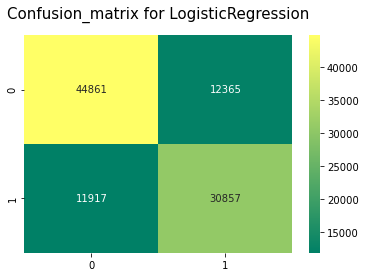

In [296]:
result_rf=cross_val_score(logReg,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for LogisticRegression  is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(logReg,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for LogisticRegression', y=1.05, size=15)

### KNN

In [297]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [298]:
Y_pred_KNN = KNN.predict(X_test)

In [299]:
accuracy_score(y_train, Y_pred_KNN, normalize=True)

0.53634

The cross validated score for LogisticRegression  is: 75.72


Text(0.5, 1.05, 'Confusion_matrix for LogisticRegression')

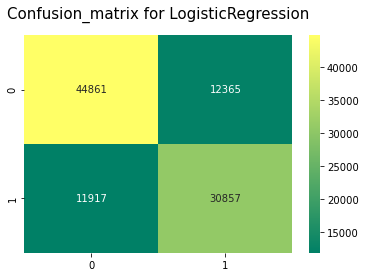

In [300]:
result_rf=cross_val_score(logReg,X_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for LogisticRegression  is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(logReg,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for LogisticRegression', y=1.05, size=15)

In [302]:
#X_test['Survived'] = Y_pred_LogReg.astype(int) # или Y_pred_KNN.astype(int)
#X_test['Survived'].to_csv('data/titanic-predictions.csv', index_label='PassengerId')

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

### Cabin

In [304]:
train_df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,AgeBand,IsAlone,Age*Class
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,2,209245,2,C12239,0,"(34.8, 52.2]",0,2
1,0,3,"Bryan, Drew",0,1,27323,1,NaN,0,"(17.4, 34.8]",1,3
2,0,3,"Owens, Kenneth",0,0,CA 457703,3,NaN,0,"(-0.087, 17.4]",0,0
3,0,3,"Kramer, James",0,1,A. 10866,1,NaN,0,"(17.4, 34.8]",1,3
4,1,3,"Bond, Michael",0,1,427635,0,NaN,0,"(17.4, 34.8]",1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",1,3,PC 15008,1,D17243,1,"(52.2, 69.6]",1,6
99996,0,2,"Brown, Herman",0,3,13273,1,NaN,0,"(52.2, 69.6]",1,6
99997,0,3,"Childress, Charles",0,2,NaN,0,NaN,0,"(34.8, 52.2]",1,6


In [305]:
data_ex = train_df.copy()

In [306]:
data_ex = data_ex[['Survived', 'Cabin']]

In [307]:
def get_has_cabin(var):
    """
    This function checks if a value is Null or not.
    if yes, it means the passenger has no ticket information 
    if no, then it returns the letter of the ticket 
    """
    if var != var:
        return 'missing_value'
    else:
        return var[0]

data_ex['cabin_new'] = data_ex.apply(lambda x: get_has_cabin(x['Cabin']), axis=1)

In [308]:
data_ex.groupby('cabin_new').mean()

,Survived
cabin_new,
A,0.274616
B,0.630192
C,0.712220
D,0.732197
E,0.617496
F,0.837104
G,0.836100
T,0.437500
missing_value,0.342101


- попробуем сгруппировать полученную информацию в 3 группы

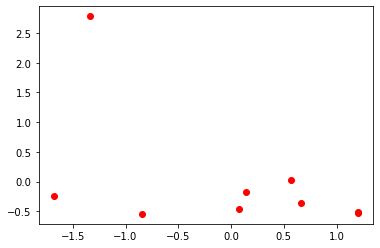

                      X         Y  label
cabin_new                               
A             -1.680317 -0.235459      2
B              0.143754 -0.179978      0
C              0.564548  0.034989      0
D              0.667027 -0.366322      0
E              0.078622 -0.458857      0
F              1.205191 -0.512084      0
G              1.200038 -0.520955      0
T             -0.844737 -0.543010      2
missing_value -1.334126  2.781675      1


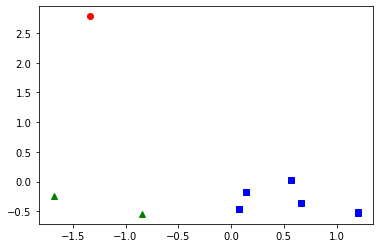

In [309]:
X = data_ex.groupby('cabin_new').mean()['Survived']
Y = data_ex.groupby('cabin_new').count()['Survived']

#normalization 
X = (X - np.mean(X))/np.std(X)
Y = (Y - np.mean(Y))/np.std(Y)

array = np.array([[X[i], Y[i]] for i in range(len(X))])
plt.plot(X,Y, 'ro')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=0).fit(array)
df_clusters = pd.DataFrame(array, columns = ['X', 'Y'])
df_clusters['label'] = kmeans.labels_
df_clusters.index = data_ex.groupby('cabin_new').mean().index
print(df_clusters)
for i in range(len(df_clusters)):
    point = [df_clusters.X.iloc[i], df_clusters.Y.iloc[i]]
    if df_clusters.label.iloc[i] == 0:
        plt.plot(point[0], point[1], 'bs')
    elif df_clusters.label.iloc[i] == 1:
        plt.plot(point[0], point[1], 'ro')
    elif df_clusters.label.iloc[i] == 2:
        plt.plot(point[0], point[1], 'g^')
plt.show()

In [310]:
mapping_dict = dict()

list_cat = data_ex.groupby('cabin_new').mean().index
list_label = kmeans.labels_

for i in range(len(list_cat)):
    mapping_dict[list_cat[i]] = list_label[i]
mapping_dict
mapping_dict_2 = {2:'cab_2', 1:'cab_2', 0:'cab_2'}

#the second mapping converts into strings which let sklearn converts this variable into dummies later

data_ex.cabin_new = data_ex.cabin_new.map(mapping_dict).map(mapping_dict_2)
data_ex.groupby('cabin_new').mean()

,Survived
cabin_new,
cab_2,0.42774


In [311]:
train_df['cabin_new'] = train_df.apply(lambda x: get_has_cabin(x['Cabin']), axis=1)
train_df.cabin_new = train_df.cabin_new.map(mapping_dict).map(mapping_dict_2)

test_df['cabin_new'] = test_df.apply(lambda x: get_has_cabin(x['Cabin']), axis=1)
test_df.cabin_new = test_df.cabin_new.map(mapping_dict).map(mapping_dict_2)

train_df.drop('Cabin', axis=1, inplace = True)
test_df.drop('Cabin', axis=1, inplace = True)

- проверим, получилось ли преобразовать все Missing_value в колонке  cabin, заменив ее на cabin_new?

In [312]:
pd.DataFrame({
    'Missing_value': test_df.isna().sum(),
    'Missing(%)': (test_df.isna().sum() / test_df.shape[0]) * 100
}).sort_values(by='Missing_value', ascending=False)

,Missing_value,Missing(%)
Ticket,5181,5.181
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
Age,0,0.000
Fare,0,0.000
Embarked,0,0.000
IsAlone,0,0.000
Age*Class,0,0.000
cabin_new,0,0.000


In [313]:
pd.DataFrame({
    'Missing_value': train_df.isna().sum(),
    'Missing(%)': (train_df.isna().sum() / train_df.shape[0]) * 100
}).sort_values(by='Missing_value', ascending=False)

,Missing_value,Missing(%)
Ticket,4623,4.623
Survived,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
Age,0,0.000
Fare,0,0.000
Embarked,0,0.000
AgeBand,0,0.000
IsAlone,0,0.000


### Ticket

In [314]:
data_ex = train_df[['Survived', 'Ticket']].copy()

In [315]:
#We clean the data removing the '/' and '.'
#the separator between prefix and identifiers is the space 

def get_prefix(var):
    if str(var).isdigit():
        return 'missing_value'
    else:

        var_ = str(var).replace('.','').replace('/', '').split(' ')[0]
        return var_

In [316]:
list_prefix = list()
for i in range(len(data_ex)):
    list_prefix.append(get_prefix(data_ex.Ticket.iloc[i]))
data_ex['prefix'] = list_prefix

In [317]:
data_ex.head()

,Survived,Ticket,prefix
PassengerId,,,
0,1,209245,missing_value
1,0,27323,missing_value
2,0,CA 457703,CA
3,0,A. 10866,A
4,1,427635,missing_value


- missing_value, нет префикса - будем считать, что, вероятно, эти пассажиры не имеют места на корабле

In [318]:
data_ex.groupby('prefix').count()['Survived']

prefix
A                 3750
A4                 533
A5                1804
AQ3                 30
AQ4                 73
AS                  44
C                  220
CA                2448
CASOTON             37
FC                 296
FCC                577
Fa                  54
LP                  56
PC                6375
PP                 622
PPP                149
SC                 164
SCA3                33
SCA4                71
SCAH               525
SCOW               101
SCPARIS           1248
SCParis            530
SOC                339
SOP                 36
SOPP               134
SOTONO2            290
SOTONOQ            992
SP                  34
STONO             1512
STONO2             416
STONOQ              38
SWPP                69
WC                 711
WEP                344
missing_value    70722
nan               4623
Name: Survived, dtype: int64

- Таким образом, префикс кажется хорошим предсказателем выживания людей. Для уменьшения вариаций объединим их в 3 группы, используя среднее значение выживания и количество людей на префикс для группировки.

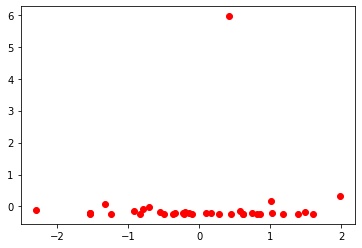

                      X         Y  label
prefix                                  
A             -1.320484  0.091718      0
A4            -0.343466 -0.190014      0
A5            -0.784956 -0.078705      0
AQ3           -1.245507 -0.234064      0
AQ4            1.392798 -0.230299      1
AS             1.182714 -0.232838      1
C             -0.223098 -0.217425      0
CA            -0.698802 -0.022306      0
CASOTON       -0.371624 -0.233451      0
FC             0.744477 -0.210769      1
FCC           -0.556001 -0.186160      0
Fa            -0.828970 -0.231962      0
LP             0.612174 -0.231787      1
PC             1.985105  0.321605      1
PP             1.484752 -0.182219      1
PPP           -0.103874 -0.223643      0
SC             0.820351 -0.222329      1
SCA3           1.608718 -0.233802      1
SCA4           0.615709 -0.230474      1
SCAH           0.093362 -0.190714      1
SCOW          -0.493885 -0.227846      0
SCPARIS        0.581598 -0.127397      1
SCParis        1

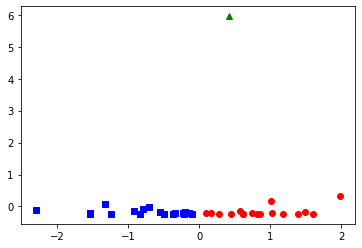

In [319]:
#mean per label
X = data_ex.groupby('prefix').mean()['Survived']
# count per label
Y = data_ex.groupby('prefix').count()['Survived']

#normalization 
X = (X - np.mean(X))/np.std(X)
Y = (Y - np.mean(Y))/np.std(Y)

array = np.array([[X[i], Y[i]] for i in range(len(X))])
plt.plot(X,Y, 'ro')
plt.show()

#k-means clustering 
kmeans = KMeans(n_clusters=3, random_state=0).fit(array)
df_clusters = pd.DataFrame(array, columns = ['X', 'Y'])
df_clusters['label'] = kmeans.labels_
df_clusters.index = data_ex.groupby('prefix').mean().index
print(df_clusters)

#group plotting 

for i in range(len(df_clusters)):
    point = [df_clusters.X.iloc[i], df_clusters.Y.iloc[i]]
    if df_clusters.label.iloc[i] == 0:
        plt.plot(point[0], point[1], 'bs')
    elif df_clusters.label.iloc[i] == 1:
        plt.plot(point[0], point[1], 'ro')
    elif df_clusters.label.iloc[i] == 2:
        plt.plot(point[0], point[1], 'g^')
plt.show()

In [320]:
mapping_dict = dict()

list_cat = data_ex.groupby('prefix').mean().index
list_label = kmeans.labels_

for i in range(len(list_cat)):
    mapping_dict[list_cat[i]] = list_label[i]
mapping_dict
mapping_dict_2 = {2:'Prefix_2', 1:'Prefix_1', 0:'Prefix_0'}

#the second mapping converts into strings which let sklearn converts this variable into dummies later

data_ex.prefix = data_ex.prefix.map(mapping_dict).map(mapping_dict_2)
data_ex.groupby('prefix').mean()

,Survived
prefix,
Prefix_0,0.230337
Prefix_1,0.567914
Prefix_2,0.436894


- введем колонку prefix для дальнешего обучения, а ticket полностью удалим

In [321]:
train_df['prefix'] = train_df.apply(lambda x: get_prefix(x['Ticket']), axis=1)
train_df.prefix = train_df.prefix.map(mapping_dict).map(mapping_dict_2)

test_df['prefix'] = test_df.apply(lambda x: get_prefix(x['Ticket']), axis=1)
test_df.prefix = test_df.prefix.map(mapping_dict).map(mapping_dict_2)

train_df.drop('Ticket', axis = 1, inplace=True)
test_df.drop('Ticket', axis = 1, inplace=True)

In [322]:
pd.DataFrame({
    'Missing_value': test_df.isna().sum(),
    'Missing(%)': (test_df.isna().sum() / test_df.shape[0]) * 100
}).sort_values(by='Missing_value', ascending=False)

,Missing_value,Missing(%)
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
Fare,0,0.0
Embarked,0,0.0
IsAlone,0,0.0
Age*Class,0,0.0
cabin_new,0,0.0
prefix,0,0.0


In [323]:
pd.DataFrame({
    'Missing_value': train_df.isna().sum(),
    'Missing(%)': (train_df.isna().sum() / train_df.shape[0]) * 100
}).sort_values(by='Missing_value', ascending=False)

,Missing_value,Missing(%)
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
Fare,0,0.0
Embarked,0,0.0
AgeBand,0,0.0
IsAlone,0,0.0
Age*Class,0,0.0


In [324]:
train_df_2 = train_df.drop(columns=['Name', 'AgeBand'])
test_df_2= test_df.drop(columns=['Name'])

In [327]:
X_train = train_df_2.drop("Survived", axis=1)
y_train = train_df_2["Survived"]
X_test  = test_df_2
X_train.shape, y_train.shape, X_test.shape

((100000, 9), (100000,), (100000, 9))

- Лучшее, что получилось после различных вариаций гиперпараметров на Kggle - max accuracy score = 0.77

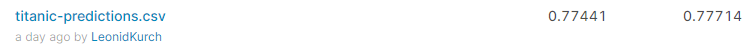

Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.0, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 3.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.